In [27]:
import pandas_datareader
import matplotlib.pyplot as plt 
import pandas as pd
import yfinance as yf


In [28]:
yf.pdr_override()

In [29]:
pandas_datareader.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [30]:
start = "1926-01-01"


In [31]:
ff = pandas_datareader.famafrench.FamaFrenchReader("F-F_Research_Data_Factors", freq="M", start=start).read()

In [32]:
ff

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 1926-07    2.96 -2.56 -2.43  0.22
 1926-08    2.64 -1.17  3.82  0.25
 1926-09    0.36 -1.40  0.13  0.23
 1926-10   -3.24 -0.09  0.70  0.32
 1926-11    2.53 -0.10 -0.51  0.31
 ...         ...   ...   ...   ...
 2022-07    9.57  2.81 -4.10  0.08
 2022-08   -3.77  1.39  0.31  0.19
 2022-09   -9.35 -0.82  0.03  0.19
 2022-10    7.83  0.10  8.05  0.23
 2022-11    4.60 -3.40  1.39  0.29
 
 [1157 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 1927   29.47  -2.04  -4.54  3.12
 1928   35.39   4.51  -6.17  3.56
 1929  -19.54 -30.70  11.67  4.75
 1930  -31.23  -5.17 -11.54  2.41
 1931  -45.11   3.70 -13.95  1.07
 ...      ...    ...    ...   ...
 2017   21.51  -4.97 -13.51  0.80
 2018   -6.95  -3.21  -9.73  1.83
 2019   28.28  -6.10 -10.34  2.15
 2020   23.66  13.17 -46.57  0.45
 2021   23.56  -3.92  25.57  0.04
 
 [95 rows x 4 columns],
 'DESCR': 'F-F Research Data Factors\n-----

In [33]:
ff_df = ff[0]


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

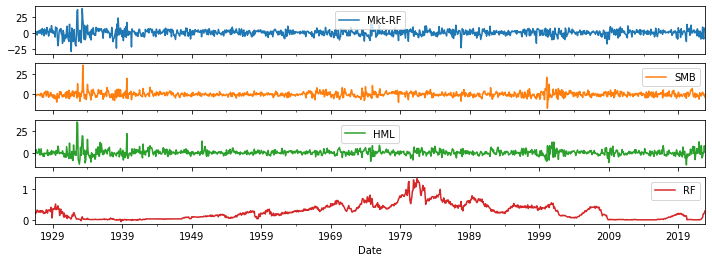

In [34]:
ff_df.plot(subplots=True, figsize=(12,4))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

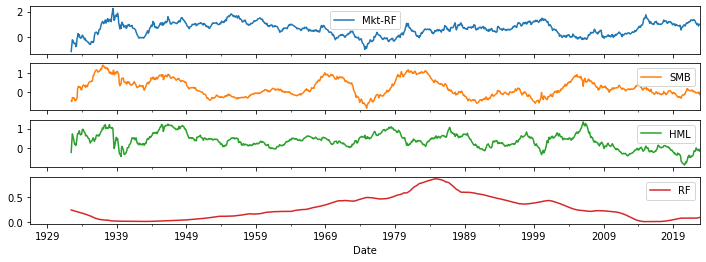

In [35]:
ff_df.rolling(72).mean().plot(subplots=True, figsize=(12,4))

In [36]:
ff_mom_df = pandas_datareader.famafrench.FamaFrenchReader("F-F_Momentum_Factor", freq="M", start=start).read()[0]

array([<AxesSubplot:xlabel='Date'>], dtype=object)

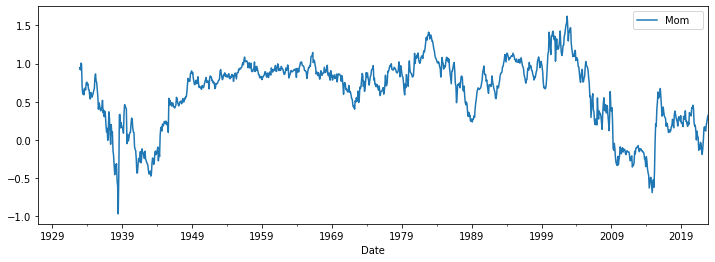

In [37]:
ff_mom_df.rolling(72).mean().plot(subplots=True, figsize=(12,4))


In [38]:
ff_df
ff_mom_df 

,Mom
Date,
1927-01,0.36
1927-02,-2.14
1927-03,3.61
1927-04,4.30
1927-05,3.00
...,...
2022-07,-3.96
2022-08,2.10
2022-09,3.48


In [39]:
ffac_merged_df = pd.merge(ff_df, ff_mom_df, how="inner",on='Date', sort=True, copy=True, indicator=False, validate='one_to_one')

In [40]:
ffac_merged_df

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1927-01,-0.06,-0.37,4.54,0.25,0.36
1927-02,4.18,0.04,2.94,0.26,-2.14
1927-03,0.13,-1.65,-2.61,0.30,3.61
1927-04,0.46,0.30,0.81,0.25,4.30
1927-05,5.44,1.53,4.73,0.30,3.00
...,...,...,...,...,...
2022-07,9.57,2.81,-4.10,0.08,-3.96
2022-08,-3.77,1.39,0.31,0.19,2.10
2022-09,-9.35,-0.82,0.03,0.19,3.48


In [45]:
AAPL_data = pandas_datareader.data.get_data_yahoo('AAPL')["Adj Close"].resample("M").ffill().pct_change()

[*********************100%***********************]  1 of 1 completed


In [46]:
AAPL_data

Date
1980-12-31         NaN
1981-01-31   -0.172163
1981-02-28   -0.061943
1981-03-31   -0.075475
1981-04-30    0.158162
                ...   
2022-09-30   -0.120977
2022-10-31    0.109551
2022-11-30   -0.033027
2022-12-31   -0.122273
2023-01-31    0.026784
Freq: M, Name: Adj Close, Length: 506, dtype: float64

In [47]:
AAPL_df = AAPL_data.to_frame()

In [48]:
AAPL_df

,Adj Close
Date,
1980-12-31,NaN
1981-01-31,-0.172163
1981-02-28,-0.061943
1981-03-31,-0.075475
1981-04-30,0.158162
...,...
2022-09-30,-0.120977
2022-10-31,0.109551
2022-11-30,-0.033027


In [51]:
AAPL_df.index.dtype

dtype('<M8[ns]')

In [52]:
ffac_merged_df.index.dtype

period[M]

In [54]:
AAPL_df['str_date'] = AAPL_df.index.astype(str)
AAPL_df['dt_date'] = pd.to_datetime(AAPL_df['str_date']).dt.strftime('%Y-%m')

In [56]:
AAPL_df.dt_date.dtype 

dtype('O')

In [57]:
ffac_merged_df['str_date'] = ffac_merged_df.index.astype(str)
ffac_merged_df['dt_date'] = pd.to_datetime(ffac_merged_df['str_date']).dt.strftime('%Y-%m')

In [58]:
ffac_merged_df.dt_date.dtype

dtype('O')

In [59]:
AAPL_ffac_merge_df = pd.merge(AAPL_df, ffac_merged_df, how="inner", on='dt_date', sort=True, copy=True, indicator=False, validate="one_to_one")

In [61]:
AAPL_ffac_merge_df.drop(columns=['str_date_x', 'str_date_y'], inplace=True)

In [62]:
AAPL_ffac_merge_df.rename(columns={'Adj Close': "AAPL"}, inplace=True)

In [72]:
AAPL_ffac_merge_df.keys()

Index(['AAPL', 'dt_date', 'Mkt-RF', 'SMB', 'HML', 'RF', 'Mom   ', 'AAPL_RF'], dtype='object')

In [64]:
AAPL_ffac_merge_df['AAPL_RF'] = AAPL_ffac_merge_df['AAPL']*100 - AAPL_ffac_merge_df['RF']

In [67]:
AAPL_ffac_merge_df.dropna(axis=0, inplace=True)

In [69]:
from statsmodels.api import OLS 

In [74]:
AAPL_ffac_merge_df.rename(columns={'Mom   ': "MOM"}, inplace=True)

In [75]:
results = OLS(AAPL_ffac_merge_df['AAPL_RF'], AAPL_ffac_merge_df[['Mkt-RF', 'SMB', 'HML', 'MOM']], missing='drop').fit()

In [76]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                AAPL_RF   R-squared (uncentered):                   0.289
Model:                            OLS   Adj. R-squared (uncentered):              0.284
Method:                 Least Squares   F-statistic:                              50.80
Date:                Fri, 13 Jan 2023   Prob (F-statistic):                    7.01e-36
Time:                        12:01:34   Log-Likelihood:                         -1920.0
No. Observations:                 503   AIC:                                      3848.
Df Residuals:                     499   BIC:                                      3865.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.2721      0.115     11.054      0.000       1.046       1.498
SMB            0.2313      0.173      1.337      0.182      -0.109       0.571
HML           -0.8250      0.167     -4.926      0.000      -1.154      -0.496
MOM           -0.0486      0.117     -0.414      0.679      -0.279       0.182
==============================================================================
Omnibus:                       14.820   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               30.485
Skew:                          -0.058   Prob(JB):                     2.40e-07
Kurtosis:                       4.200   Cond. No.                         1.87
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
#Add intercept to the OLS model
# We need to add a constant to the DF!
import statsmodels.tools 
AAPL_ffac_merge_df_c = statsmodels.tools.add_constant(AAPL_ffac_merge_df, prepend=True)

In [81]:
AAPL_ffac_merge_df_c

,const,AAPL,dt_date,Mkt-RF,SMB,HML,RF,MOM,AAPL_RF
1,1.0,-0.172163,1981-01,-5.04,2.92,6.72,1.04,-7.95,-18.256290
2,1.0,-0.061943,1981-02,0.57,-0.34,1.02,1.07,-1.35,-7.264301
3,1.0,-0.075475,1981-03,3.56,3.54,0.64,1.21,0.74,-8.757460
4,1.0,0.158162,1981-04,-2.11,4.40,2.28,1.08,-0.91,14.736175
5,1.0,0.167399,1981-05,0.11,2.00,-0.42,1.15,3.70,15.589880
...,...,...,...,...,...,...,...,...,...
499,1.0,0.188634,2022-07,9.57,2.81,-4.10,0.08,-3.96,18.783362
500,1.0,-0.031208,2022-08,-3.77,1.39,0.31,0.19,2.10,-3.310796
501,1.0,-0.120977,2022-09,-9.35,-0.82,0.03,0.19,3.48,-12.287704
502,1.0,0.109551,2022-10,7.83,0.10,8.05,0.23,3.89,10.725140


In [82]:
results = OLS(AAPL_ffac_merge_df_c['AAPL_RF'], AAPL_ffac_merge_df_c[['const','Mkt-RF', 'SMB', 'HML', 'MOM']], missing='drop').fit()

In [83]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AAPL_RF   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     49.59
Date:                Fri, 13 Jan 2023   Prob (F-statistic):           3.97e-35
Time:                        12:07:32   Log-Likelihood:                -1915.9
No. Observations:                 503   AIC:                             3842.
Df Residuals:                     498   BIC:                             3863.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4584      0.507      2.877      0.004       0.462       2.454
Mkt-RF         1.2043      0.117     10.323      0.000       0.975       1.434
SMB            0.2246      0.172      1.308      0.192      -0.113       0.562
HML           -0.9055      0.169     -5.371      0.000      -1.237      -0.574
MOM           -0.1114      0.119     -0.939      0.348      -0.345       0.122
==============================================================================
Omnibus:                       14.039   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               28.060
Skew:                          -0.056   Prob(JB):                     8.07e-07
Kurtosis:                       4.152   Cond. No.                         5.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""